In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['maximum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [7]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['maximum_nights_avg_ntm'].max()
Min = Mexico['maximum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 1825.0]

In [8]:
# Calculamos el rango R
R = Max - Min
R

1824.0

In [9]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [10]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

116.25512408907578

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [11]:
# Categorización de variables
intervalos = np.linspace (1, 1825, 16)
intervalos

array([1.0000e+00, 1.2260e+02, 2.4420e+02, 3.6580e+02, 4.8740e+02,
       6.0900e+02, 7.3060e+02, 8.5220e+02, 9.7380e+02, 1.0954e+03,
       1.2170e+03, 1.3386e+03, 1.4602e+03, 1.5818e+03, 1.7034e+03,
       1.8250e+03])

In [12]:
# Creamos las categorías
categorias = [
    "Una noche",
    "Estancia corta",
    "Estancia breve",
    "Estancia estándar",
    "Estancia moderada",
    "Estancia prolongada",
    "Estancia larga",
    "Estancia muy larga",
    "Estancia extendida",
    "Estancia excepcional",
    "Estancia duradera",
    "Estancia extensiva",
    "Estancia prolongada máxima",
    "Estancia de larga duración",
    "Estancia ilimitada"
]


In [13]:
# Creamos las ctegorias en la columna numerica
Mexico['maximum_nights_avg_ntm'] = pd.cut ( x = Mexico ['maximum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Mexico['maximum_nights_avg_ntm']

0                   Una noche
1              Estancia breve
2                   Una noche
3              Estancia corta
4        Estancia excepcional
                 ...         
26577               Una noche
26578          Estancia breve
26579          Estancia breve
26580          Estancia breve
26581          Estancia breve
Name: maximum_nights_avg_ntm, Length: 26582, dtype: category
Categories (15, object): ['Una noche' < 'Estancia corta' < 'Estancia breve' < 'Estancia estándar' ... 'Estancia extensiva' < 'Estancia prolongada máxima' < 'Estancia de larga duración' < 'Estancia ilimitada']

In [14]:
table1 = freq_tbl(Mexico['maximum_nights_avg_ntm'])
table1

,maximum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Estancia excepcional,14244,0.535851,0.536114
1,Estancia breve,7607,0.286171,0.822425
2,Una noche,3462,0.130239,0.952727
3,Estancia corta,423,0.015913,0.968648
4,Estancia prolongada,315,0.011850,0.980504
5,Estancia extendida,243,0.009142,0.989650
6,Estancia estándar,86,0.003235,0.992886
7,Estancia larga,82,0.003085,0.995973
8,Estancia muy larga,57,0.002144,0.998118
9,Estancia moderada,49,0.001843,0.999962


In [15]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,maximum_nights_avg_ntm,frequency
0,Estancia excepcional,14244
1,Estancia breve,7607
2,Una noche,3462
3,Estancia corta,423
4,Estancia prolongada,315
5,Estancia extendida,243
6,Estancia estándar,86
7,Estancia larga,82
8,Estancia muy larga,57
9,Estancia moderada,49


In [16]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 1]
Filtro

,maximum_nights_avg_ntm,frequency
0,Estancia excepcional,14244
1,Estancia breve,7607
2,Una noche,3462
3,Estancia corta,423
4,Estancia prolongada,315
5,Estancia extendida,243
6,Estancia estándar,86
7,Estancia larga,82
8,Estancia muy larga,57
9,Estancia moderada,49


In [18]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('maximum_nights_avg_ntm')
Filtro_index

,frequency
maximum_nights_avg_ntm,
Estancia excepcional,14244
Estancia breve,7607
Una noche,3462
Estancia corta,423
Estancia prolongada,315
Estancia extendida,243
Estancia estándar,86
Estancia larga,82
Estancia muy larga,57


Text(0, 0.5, 'Frecuencia')

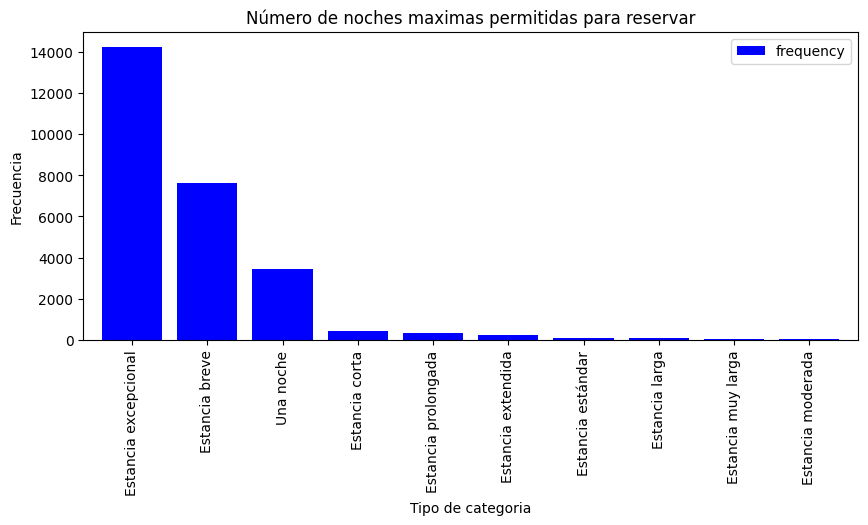

In [19]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches maximas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')